In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

print("Training Data First 5 Rows:\n", train_data.head())
print("Test Data First 5 Rows:\n", test_data.head())
print("\nMissing Values (Training):\n", train_data.isnull().sum())
print("\nMissing Values (Test):\n", test_data.isnull().sum())

Training Data First 5 Rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


General Statistics (Training Data):
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       

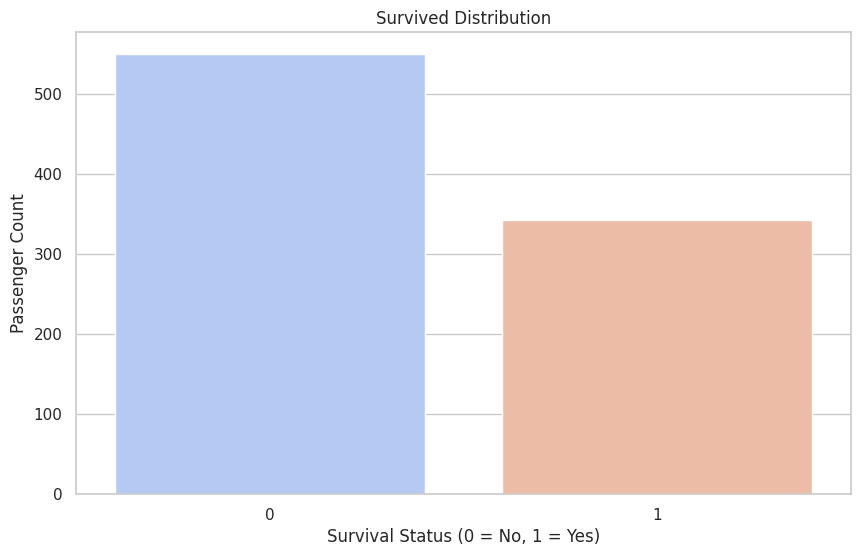

In [4]:
print("\nGeneral Statistics (Training Data):\n", train_data.describe(include='all'))

sns.countplot(x='Survived', data=train_data, palette='coolwarm')
plt.title("Survived Distribution")
plt.xlabel("Survival Status (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.show()

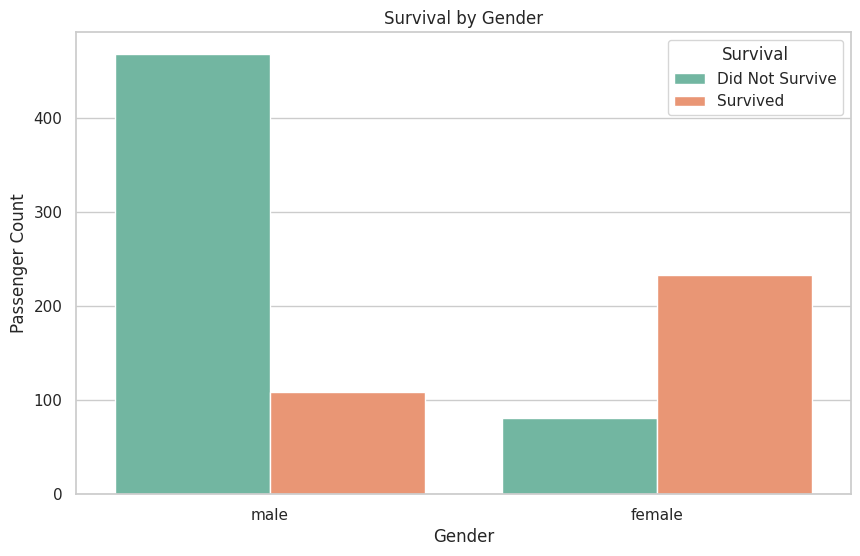

In [5]:
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set2')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Passenger Count")
plt.legend(title="Survival", loc="upper right", labels=["Did Not Survive", "Survived"])
plt.show()

<ipython-input-6-2ab99f37f196>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'].dropna(), bins=30, kde=True, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


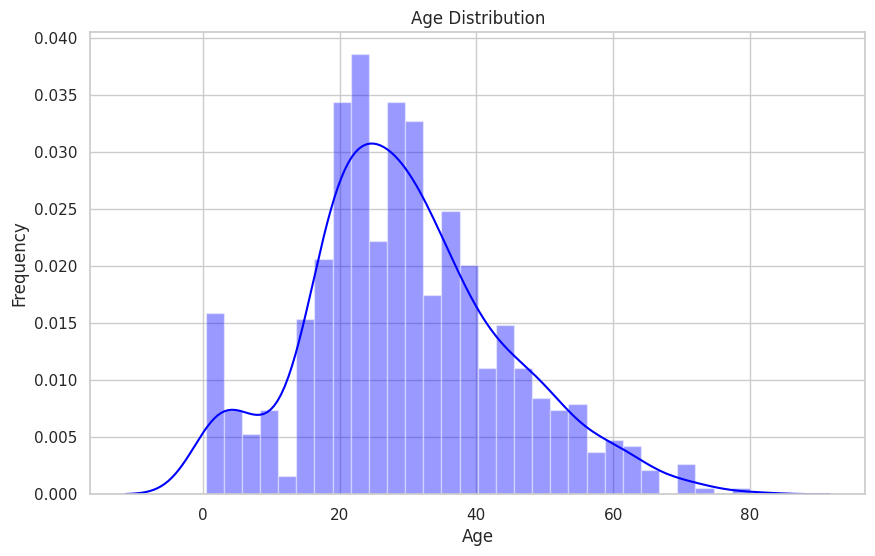

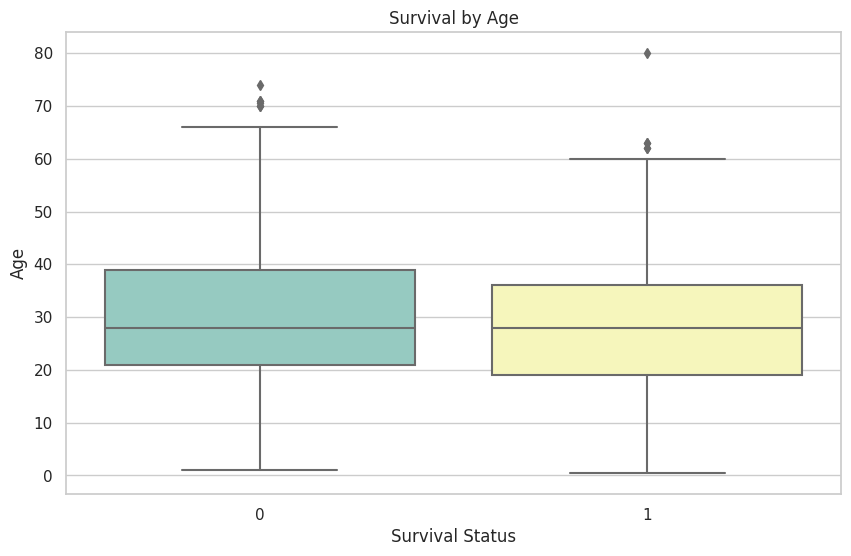

In [6]:
sns.distplot(train_data['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_data, palette='Set3')
plt.title("Survival by Age")
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.show()

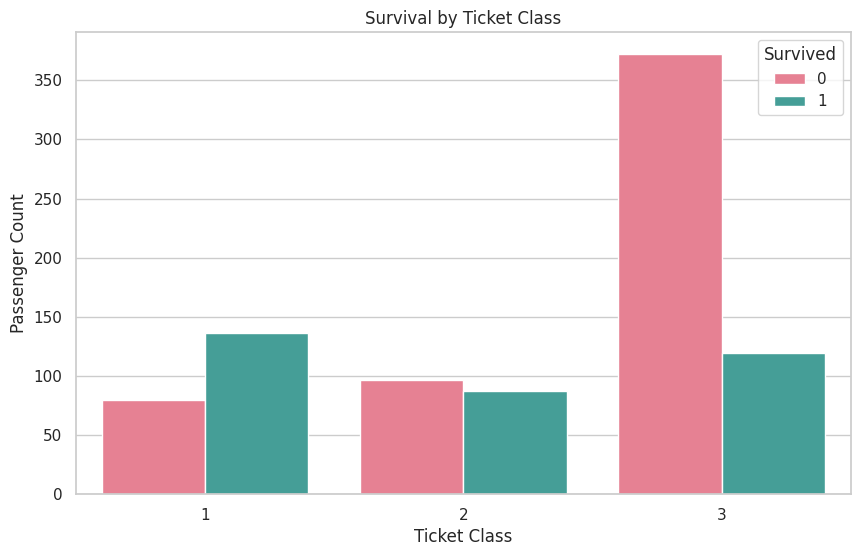

In [7]:
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='husl')
plt.title("Survival by Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Passenger Count")
plt.show()

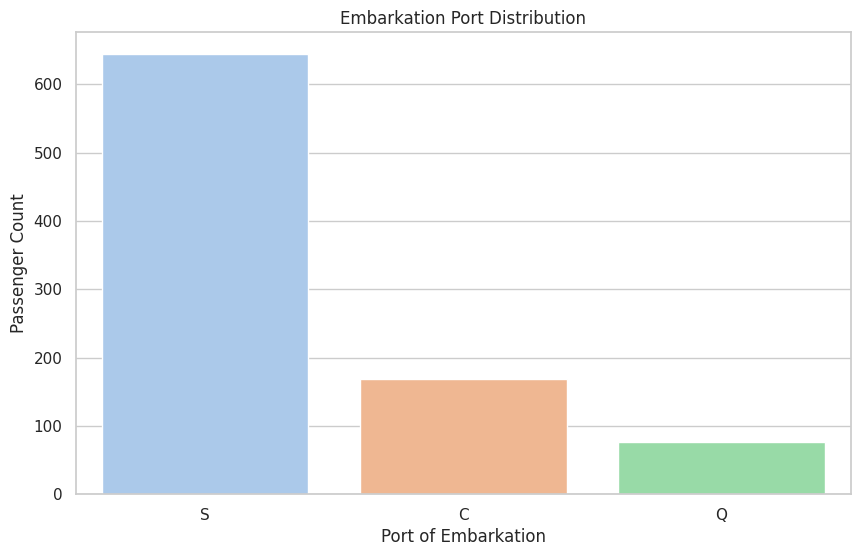

In [8]:
sns.countplot(x='Embarked', data=train_data, palette='pastel')
plt.title("Embarkation Port Distribution")
plt.xlabel("Port of Embarkation")
plt.ylabel("Passenger Count")
plt.show()

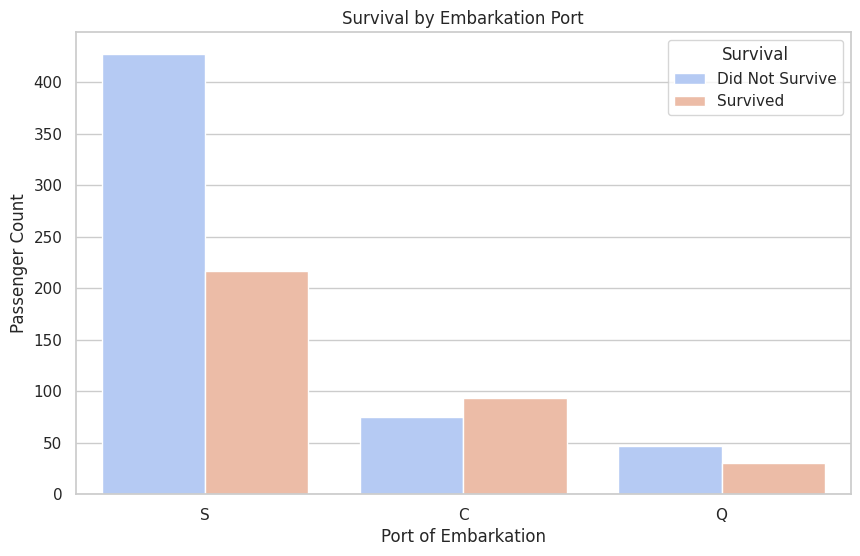

In [9]:
sns.countplot(x='Embarked', hue='Survived', data=train_data, palette='coolwarm')
plt.title("Survival by Embarkation Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Passenger Count")
plt.legend(title="Survival", labels=["Did Not Survive", "Survived"])
plt.show()

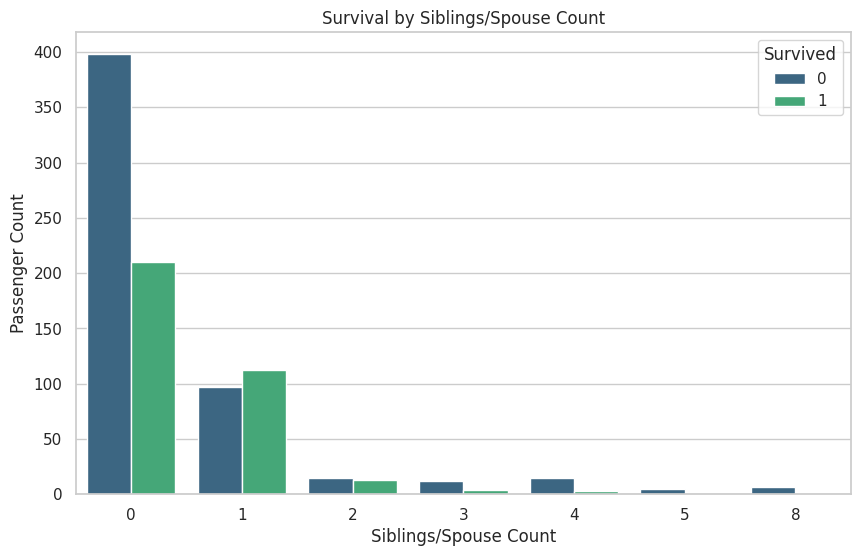

In [10]:
sns.countplot(x='SibSp', hue='Survived', data=train_data, palette='viridis')
plt.title("Survival by Siblings/Spouse Count")
plt.xlabel("Siblings/Spouse Count")
plt.ylabel("Passenger Count")
plt.show()

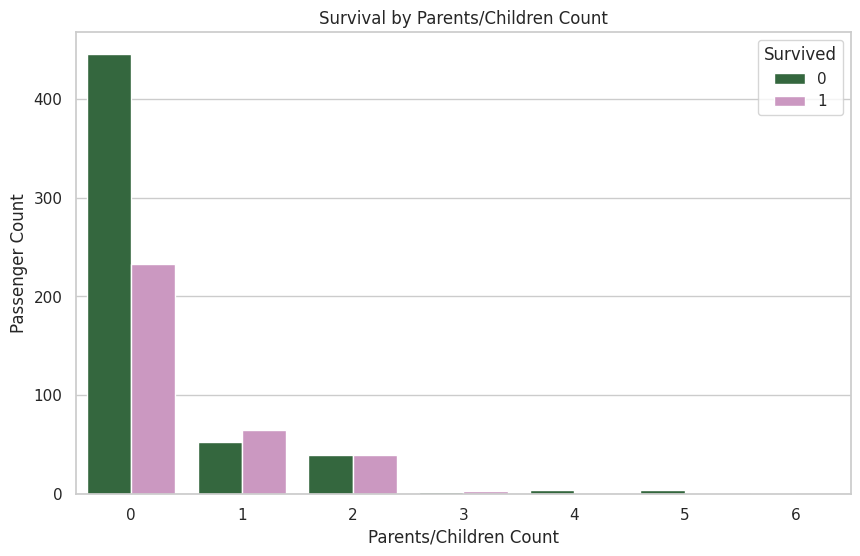

In [11]:
sns.countplot(x='Parch', hue='Survived', data=train_data, palette='cubehelix')
plt.title("Survival by Parents/Children Count")
plt.xlabel("Parents/Children Count")
plt.ylabel("Passenger Count")
plt.show()

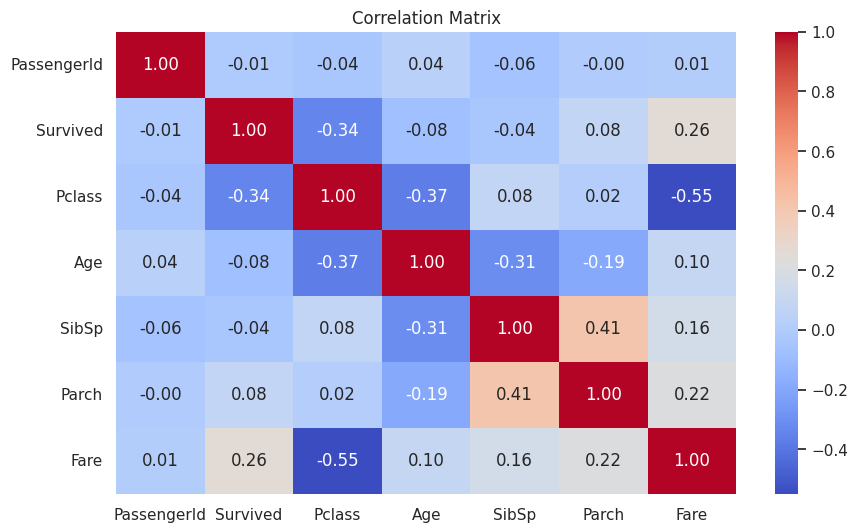

In [12]:
numerical_data = train_data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [13]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\nModel Accuracy (Validation):", accuracy)
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Model Accuracy (Validation): 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



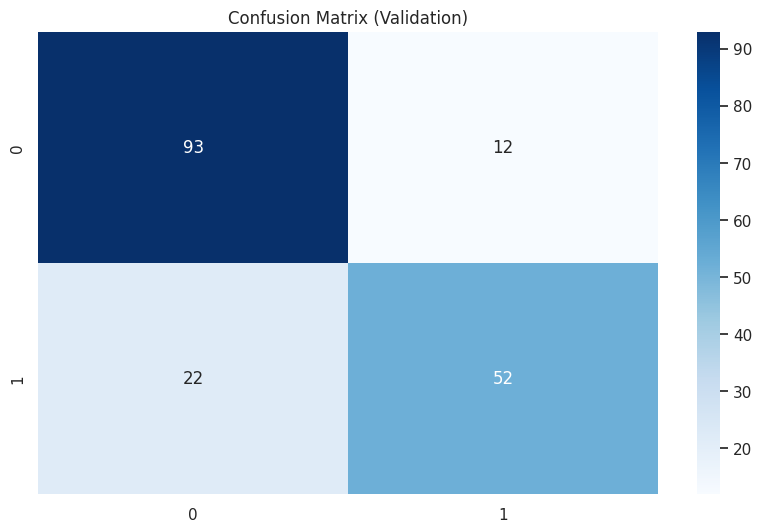

In [15]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Validation)")
plt.show()

In [16]:
predictions = model.predict(X_test)

gender_submission_comparison = gender_submission.copy()
gender_submission_comparison['Predicted'] = predictions
gender_submission_comparison['Correct'] = gender_submission_comparison['Survived'] == gender_submission_comparison['Predicted']
correct_predictions = gender_submission_comparison['Correct'].sum()
total_predictions = len(gender_submission_comparison)
accuracy_submission = correct_predictions / total_predictions

print(f"\nGender Submission Comparison Accuracy: {accuracy_submission:.2f}")


Gender Submission Comparison Accuracy: 0.93


In [17]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Prediction results saved to submission.csv.")

Prediction results saved to submission.csv.
